# Flights Capstone One: Data Wrangling

# Cleaning and Merging Business and Economy Datasets

## By Morgan Snellgrove

In this notebook we read in both the business and economy datasets. We follow the steps shown in this notebook: https://www.kaggle.com/code/shaumilsahariya/making-clean-data-from-business-and-economy-files
with a few exceptions. 

1) We keep the date column in yyyy-mm-dd format.

2) We keep the departure times and arrival times as time values instead of creating categories.

3) We keep 'stops' as numeric values. 

4) We include duration_hours and duration_minutes as two new columns. 

Then we compare this dataframe, called 'new', with the dataframe, called 'clean_dataset' using datacompy. We find that there are 108 rows in 'new' that are not in 'clean_dataset'. These rows are stored in the dataframe called 'missing_rows'.

At the end, we decide to correct 4 duration values before saving the final dataframe as 'final_clean_flight_dataset.csv'. 

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re
import datacompy

## Read in csv files

In [2]:
business = pd.read_csv('./Data/archive/business.csv')
economy = pd.read_csv('./Data/archive/economy.csv')

In [3]:
business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [4]:
economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


## Adding in Class column in each dataframe

In [5]:
business["class"] = "business" 
economy["class"] = "economy"

## Concatenating the two dataframes

New DataFrame called 'new'.

In [6]:
new = pd.concat([economy, business],ignore_index = True)
new

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business
300257,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business
300258,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business
300259,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business


In [7]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        300261 non-null  object
 1   airline     300261 non-null  object
 2   ch_code     300261 non-null  object
 3   num_code    300261 non-null  int64 
 4   dep_time    300261 non-null  object
 5   from        300261 non-null  object
 6   time_taken  300261 non-null  object
 7   stop        300261 non-null  object
 8   arr_time    300261 non-null  object
 9   to          300261 non-null  object
 10  price       300261 non-null  object
 11  class       300261 non-null  object
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


## Creating 'flight' column 

Merging 'ch_code' and 'num_code' and dropping 'ch_code' and 'num_code' columns. 

In [8]:
new.num_code = new.num_code.astype("str")
new["flight"] = new["ch_code"] +"-"+ new["num_code"]
new.drop(["ch_code","num_code"],axis = 1,inplace = True)

In [9]:
new

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963
...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822
300257,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826
300258,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832
300259,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828


## Renaming features

In [10]:
new.rename({"dep_time": "departure_time", "from": "source_city", 
            "time_taken": "duration", "stop": "stops", "arr_time": "arrival_time",
           "to":"destination_city"}, axis = 1, inplace = True)

In [11]:
new

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963
...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822
300257,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826
300258,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832
300259,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828


## Creating 'days_left' column

In [12]:
dd = pd.DataFrame(new["date"].str.split("-",expand = True).to_numpy().astype(int),columns = ["day","month","year"])
new["days_left"] = np.where(dd["month"] > 2, dd["day"] +18, np.where(dd["month"] == 2, dd["day"] -10, dd["day"]))
new

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709,1
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157,1
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764,1
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995,1
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,31-03-2022,Vistara,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265",business,UK-822,49
300257,31-03-2022,Vistara,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105",business,UK-826,49
300258,31-03-2022,Vistara,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099",business,UK-832,49
300259,31-03-2022,Vistara,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585",business,UK-828,49


## Checking Data Types

Changing 'date' to a datetime64[ns] and 'departure_time' and 'arrival_time' to time. 

In [13]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              300261 non-null  object
 1   airline           300261 non-null  object
 2   departure_time    300261 non-null  object
 3   source_city       300261 non-null  object
 4   duration          300261 non-null  object
 5   stops             300261 non-null  object
 6   arrival_time      300261 non-null  object
 7   destination_city  300261 non-null  object
 8   price             300261 non-null  object
 9   class             300261 non-null  object
 10  flight            300261 non-null  object
 11  days_left         300261 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 27.5+ MB


In [14]:
new['date'] = pd.to_datetime(new['date'], format = '%d-%m-%Y')

In [15]:
new['departure_time'] = pd.to_datetime(new['departure_time'], format = '%H:%M').dt.time
new['arrival_time'] = pd.to_datetime(new['arrival_time'], format = '%H:%M').dt.time

In [16]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300261 non-null  datetime64[ns]
 1   airline           300261 non-null  object        
 2   departure_time    300261 non-null  object        
 3   source_city       300261 non-null  object        
 4   duration          300261 non-null  object        
 5   stops             300261 non-null  object        
 6   arrival_time      300261 non-null  object        
 7   destination_city  300261 non-null  object        
 8   price             300261 non-null  object        
 9   class             300261 non-null  object        
 10  flight            300261 non-null  object        
 11  days_left         300261 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 27.5+ MB


In [17]:
new

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,SpiceJet,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,"5,953",economy,SG-8709,1
1,2022-02-11,SpiceJet,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,"5,953",economy,SG-8157,1
2,2022-02-11,AirAsia,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,"5,956",economy,I5-764,1
3,2022-02-11,Vistara,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,"5,955",economy,UK-995,1
4,2022-02-11,Vistara,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,"5,955",economy,UK-963,1
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,09:45:00,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,"69,265",business,UK-822,49
300257,2022-03-31,Vistara,12:30:00,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,"77,105",business,UK-826,49
300258,2022-03-31,Vistara,07:05:00,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,"79,099",business,UK-832,49
300259,2022-03-31,Vistara,07:00:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,"81,585",business,UK-828,49


### Question

I see where the data type for 'date' was changed, but the datatypes for 'departure_time' and 'arrival_time' still say object. Is this an error?

The format of the times is different, but not the data type. 

## Making 'duration' a float measured in hours only

In [18]:
temp = pd.DataFrame(new["duration"].str.split(expand = True).to_numpy().astype(str), 
                    columns = ["hour","minute"])
temp["hour"] = temp["hour"].apply(lambda x: re.sub("[^0-9]","",x)).astype(int)
temp["minute"] = temp["minute"].apply(lambda r: re.sub("[^0-9]","",r)) # we has no values in minute colum some where 
temp["minute"] = np.where(temp["minute"] == "", 0, temp["minute"]) # replaceing "" with 0
temp["minute"] = temp["minute"].astype(int) #converting data type
temp

,hour,minute
0,2,10
1,2,20
2,2,10
3,2,15
4,2,20
...,...,...
300256,10,5
300257,10,25
300258,13,50
300259,10,0


In [19]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   hour    300261 non-null  int64
 1   minute  300261 non-null  int64
dtypes: int64(2)
memory usage: 4.6 MB


In [20]:
temp['hour'].unique()

array([  2,  12,  16,  11,  14,  15,   3,   5,   8,   6,  18,  23,  24,
         4,  19,  22,  26,  17,  20,  21,   7,  10,  28,   9,  13,  29,
        27,  30,  25,  31,  33,  36,  35,  34,  39,   1,  37,  40,  32,
        41,  38, 103, 102,   0,  47, 101,  42,  49,  45,  44])

In [21]:
temp['minute'].unique()

array([10, 20, 15,  5, 45, 30, 40, 50,  0, 25, 35, 55,  4, 59, 24])

### Question

The original data had values 1.01, 1.02, and 1.03 in the 'duration' column. The code above, strips out everything that isn't a digit, including the decimal point. These values are now showing up as 101, 102, and 103. 

I looked into the exact duration values those numbers came from, and they were entered as "1.03h m". Was that supposed to be interpretted as 61.8 minutes? 

Also, a lot of the duration hour times are pretty large for in-country flights...

I feel like you said to split duration into hours and minutes and keep both as separate columns. Is that correct? In that case, 'duration' needs to be treated differently... couldn't remember what you said. I wasn't sure if I should do that before we compare with the other dataframe 'Clean_Dataset'. 

## Changing 'duration' column in 'new'

In [22]:
new["duration"] = np.around((temp["hour"] + (temp["minute"]/60)),2) #saving the total hours in duration feature
new.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left
0,2022-02-11,SpiceJet,18:55:00,Delhi,2.17,non-stop,21:05:00,Mumbai,"5,953",economy,SG-8709,1
1,2022-02-11,SpiceJet,06:20:00,Delhi,2.33,non-stop,08:40:00,Mumbai,"5,953",economy,SG-8157,1
2,2022-02-11,AirAsia,04:25:00,Delhi,2.17,non-stop,06:35:00,Mumbai,"5,956",economy,I5-764,1
3,2022-02-11,Vistara,10:20:00,Delhi,2.25,non-stop,12:35:00,Mumbai,"5,955",economy,UK-995,1
4,2022-02-11,Vistara,08:50:00,Delhi,2.33,non-stop,11:10:00,Mumbai,"5,955",economy,UK-963,1


## Including duration_h and duration_m as separate columns

In [23]:
new['duration_hours'] = temp['hour']
new['duration_minutes'] = temp['minute']
new

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,duration_hours,duration_minutes
0,2022-02-11,SpiceJet,18:55:00,Delhi,2.17,non-stop,21:05:00,Mumbai,"5,953",economy,SG-8709,1,2,10
1,2022-02-11,SpiceJet,06:20:00,Delhi,2.33,non-stop,08:40:00,Mumbai,"5,953",economy,SG-8157,1,2,20
2,2022-02-11,AirAsia,04:25:00,Delhi,2.17,non-stop,06:35:00,Mumbai,"5,956",economy,I5-764,1,2,10
3,2022-02-11,Vistara,10:20:00,Delhi,2.25,non-stop,12:35:00,Mumbai,"5,955",economy,UK-995,1,2,15
4,2022-02-11,Vistara,08:50:00,Delhi,2.33,non-stop,11:10:00,Mumbai,"5,955",economy,UK-963,1,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,09:45:00,Chennai,10.08,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50:00,Hyderabad,"69,265",business,UK-822,49,10,5
300257,2022-03-31,Vistara,12:30:00,Chennai,10.42,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55:00,Hyderabad,"77,105",business,UK-826,49,10,25
300258,2022-03-31,Vistara,07:05:00,Chennai,13.83,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55:00,Hyderabad,"79,099",business,UK-832,49,13,50
300259,2022-03-31,Vistara,07:00:00,Chennai,10.00,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00:00,Hyderabad,"81,585",business,UK-828,49,10,0


## Changing 'stops' column to digits only and integer

In [24]:
new["stops"] = new["stops"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["stops"] = np.where(new["stops"] == "", 0, new["stops"]) # replacing "" with 0
new["stops"] = new["stops"].astype(int) # changing object to int
new.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,duration_hours,duration_minutes
0,2022-02-11,SpiceJet,18:55:00,Delhi,2.17,0,21:05:00,Mumbai,"5,953",economy,SG-8709,1,2,10
1,2022-02-11,SpiceJet,06:20:00,Delhi,2.33,0,08:40:00,Mumbai,"5,953",economy,SG-8157,1,2,20
2,2022-02-11,AirAsia,04:25:00,Delhi,2.17,0,06:35:00,Mumbai,"5,956",economy,I5-764,1,2,10
3,2022-02-11,Vistara,10:20:00,Delhi,2.25,0,12:35:00,Mumbai,"5,955",economy,UK-995,1,2,15
4,2022-02-11,Vistara,08:50:00,Delhi,2.33,0,11:10:00,Mumbai,"5,955",economy,UK-963,1,2,20


## Changing 'price' to digits only and integer

In [25]:
new["price"] = new["price"].apply(lambda r: re.sub("[^0-9]","",r)) # taking only digits
new["price"] = new["price"].astype(int) # changing object to int
new.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight,days_left,duration_hours,duration_minutes
0,2022-02-11,SpiceJet,18:55:00,Delhi,2.17,0,21:05:00,Mumbai,5953,economy,SG-8709,1,2,10
1,2022-02-11,SpiceJet,06:20:00,Delhi,2.33,0,08:40:00,Mumbai,5953,economy,SG-8157,1,2,20
2,2022-02-11,AirAsia,04:25:00,Delhi,2.17,0,06:35:00,Mumbai,5956,economy,I5-764,1,2,10
3,2022-02-11,Vistara,10:20:00,Delhi,2.25,0,12:35:00,Mumbai,5955,economy,UK-995,1,2,15
4,2022-02-11,Vistara,08:50:00,Delhi,2.33,0,11:10:00,Mumbai,5955,economy,UK-963,1,2,20


## Reordering the columns

In [26]:
new = new[["date","airline","flight","source_city","departure_time","stops",
     "arrival_time","destination_city","class","duration", "duration_hours", "duration_minutes", "days_left","price"]]

In [27]:
new

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2022-03-31,Vistara,UK-822,Chennai,09:45:00,1,19:50:00,Hyderabad,business,10.08,10,5,49,69265
300257,2022-03-31,Vistara,UK-826,Chennai,12:30:00,1,22:55:00,Hyderabad,business,10.42,10,25,49,77105
300258,2022-03-31,Vistara,UK-832,Chennai,07:05:00,1,20:55:00,Hyderabad,business,13.83,13,50,49,79099
300259,2022-03-31,Vistara,UK-828,Chennai,07:00:00,1,17:00:00,Hyderabad,business,10.00,10,0,49,81585


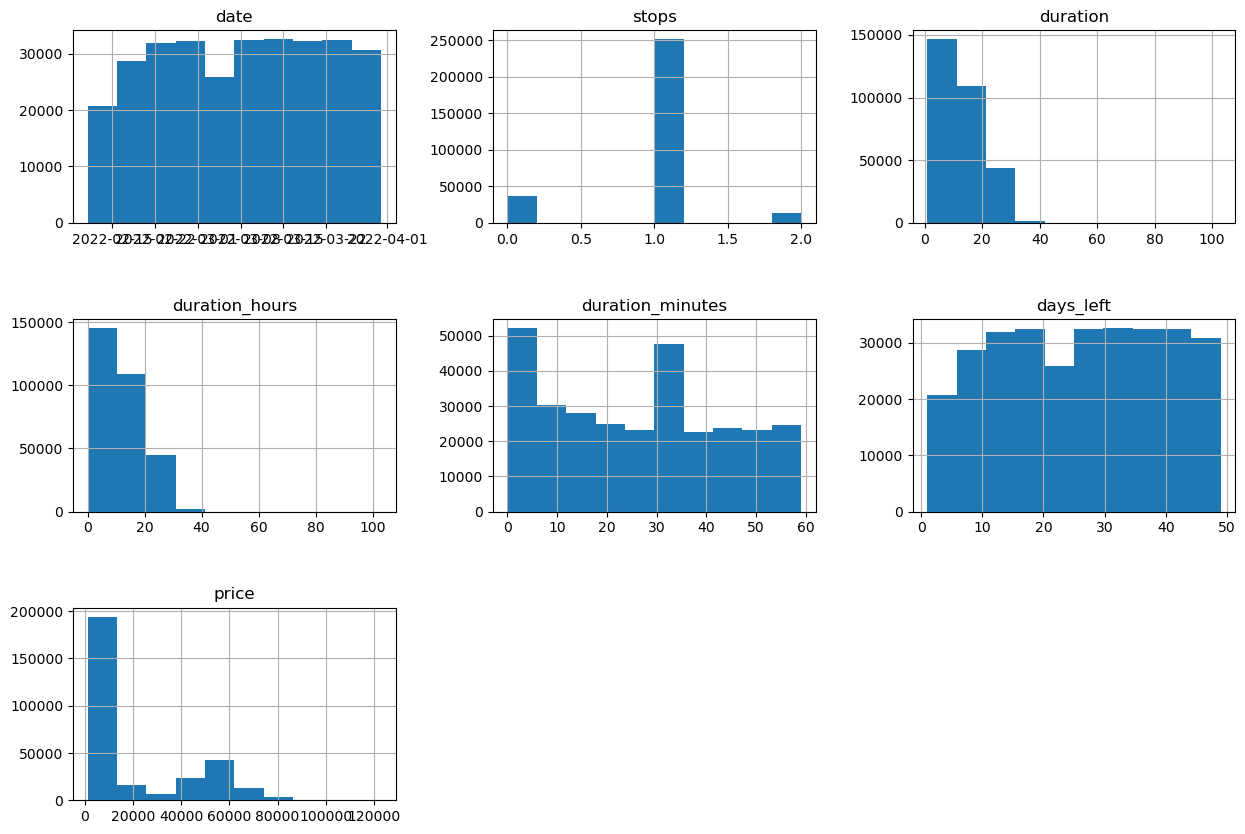

In [28]:
new.hist(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.5);

## Read in 'clean_dataset' and compare with 'new'

In [29]:
clean_dataset = pd.read_csv('./Clean_Dataset.csv')

In [30]:
clean_dataset

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [31]:
new.describe()

,stops,duration,duration_hours,duration_minutes,days_left,price
count,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,0.924213,12.219142,11.776991,26.526905,26.004473,20883.717666
std,0.398188,7.200348,7.206737,17.351118,13.560985,22695.911266
min,0.000000,0.830000,0.000000,0.000000,1.000000,1105.000000
25%,1.000000,6.750000,6.000000,10.000000,15.000000,4783.000000
50%,1.000000,11.250000,11.000000,25.000000,26.000000,7425.000000
75%,1.000000,16.170000,16.000000,40.000000,38.000000,42521.000000
max,2.000000,103.000000,103.000000,59.000000,49.000000,123071.000000


In [32]:
clean_dataset.drop(columns = 'Unnamed: 0', inplace = True)

In [33]:
clean_dataset.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


### Differences

The counts differ by 108.

Max value for 'duration' in 'new' is 103 (as expected). The max 'duration in 'clean_dataset' is 49.83.

Next, I sort_values in both dataframes by 'duration' to see if there are any other durations between 49.83 and 101. 

In [34]:
print(new.sort_values('duration', ascending = False). head())

             date    airline  flight source_city departure_time  stops  \
111315 2022-02-26   GO FIRST  G8-146   Bangalore       05:45:00      2   
96486  2022-02-26   GO FIRST  G8-146   Bangalore       05:45:00      1   
104676 2022-02-26   GO FIRST  G8-146   Bangalore       05:45:00      2   
154007 2022-02-25   GO FIRST  G8-517   Hyderabad       20:45:00      1   
193997 2022-02-12  Air India  AI-672     Chennai       16:05:00      2   

       arrival_time destination_city    class  duration  duration_hours  \
111315     09:30:00        Hyderabad  economy    103.00             103   
96486      09:10:00           Mumbai  economy    103.00             103   
104676     08:00:00          Kolkata  economy    102.00             102   
154007     21:50:00            Delhi  economy    101.00             101   
193997     17:55:00        Bangalore  economy     49.83              49   

        duration_minutes  days_left  price  
111315                 0         16   4337  
96486         

In [35]:
print(clean_dataset.sort_values('duration', ascending = False).head())

          airline  flight source_city departure_time        stops  \
194359  Air_India  AI-672     Chennai        Evening          one   
193889  Air_India  AI-672     Chennai        Evening  two_or_more   
261152  Air_India  AI-610   Bangalore        Evening          one   
119508  Air_India  AI-610   Bangalore        Evening          one   
193926    Vistara  UK-822     Chennai        Morning          one   

       arrival_time destination_city     class  duration  days_left  price  
194359      Evening        Bangalore   Economy     49.83          9  17538  
193889      Evening        Bangalore   Economy     49.83          2  23891  
261152      Evening          Chennai  Business     47.75         47  55122  
119508      Evening          Chennai   Economy     47.75         47   7461  
193926      Morning        Bangalore   Economy     47.08          3  17223  


## Comparing 'new' and 'clean_dataset' using datacompy

In [36]:
compare = datacompy.Compare(new, clean_dataset, join_columns = ['duration', 'price'])
print(compare.report())

/Users/morgansnellgrove/opt/anaconda3/lib/python3.9/site-packages/datacompy/core.py:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df1[order_column] = generate_id_within_group(


DataComPy Comparison
--------------------

DataFrame Summary
-----------------

  DataFrame  Columns    Rows
0       df1       14  300261
1       df2       11  300153

Column Summary
--------------

Number of columns in common: 11
Number of columns in df1 but not in df2: 3
Number of columns in df2 but not in df1: 0

Row Summary
-----------

Matched on: duration, price
Any duplicates on match values: Yes
Absolute Tolerance: 0
Relative Tolerance: 0
Number of rows in common: 300,153
Number of rows in df1 but not in df2: 108
Number of rows in df2 but not in df1: 0

Number of rows with some compared columns unequal: 300,153
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 7
Number of columns compared with all values equal: 4
Total number of values which compare unequal: 1,304,696

Columns with Unequal Values or Types
------------------------------------

           Column df1 dtype df2 dtype  # Unequ

## Creating DataFrame of rows missing from 'clean_dataset'

In [37]:
missing_rows = compare.df1_unq_rows

In [38]:
missing_rows

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
2036,2022-02-22,Air India,AI-807,Delhi,17:20:00,1,08:35:00,Mumbai,economy,15.25,15,15,12,12150
7816,2022-03-21,Air India,AI-475,Delhi,13:00:00,1,13:35:00,Mumbai,economy,24.58,24,35,39,4780
71637,2022-02-22,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,12,3166
73768,2022-03-08,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,26,3166
73920,2022-03-09,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,27,3166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170021,2022-03-25,Trujet,2T-623,Hyderabad,08:35:00,1,11:00:00,Bangalore,economy,2.42,2,25,43,3196
170131,2022-03-26,StarAir,S5-152,Hyderabad,20:20:00,0,21:25:00,Bangalore,economy,1.08,1,5,44,2115
170139,2022-03-26,Trujet,2T-623,Hyderabad,08:35:00,1,11:00:00,Bangalore,economy,2.42,2,25,44,3196
170514,2022-03-29,StarAir,S5-152,Hyderabad,20:20:00,0,21:25:00,Bangalore,economy,1.08,1,5,47,2115


In [39]:
missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 2036 to 170754
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              108 non-null    datetime64[ns]
 1   airline           108 non-null    object        
 2   flight            108 non-null    object        
 3   source_city       108 non-null    object        
 4   departure_time    108 non-null    object        
 5   stops             108 non-null    int64         
 6   arrival_time      108 non-null    object        
 7   destination_city  108 non-null    object        
 8   class             108 non-null    object        
 9   duration          108 non-null    float64       
 10  duration_hours    108 non-null    int64         
 11  duration_minutes  108 non-null    int64         
 12  days_left         108 non-null    int64         
 13  price             108 non-null    int64         
dtypes: datetime64[ns](1)

In [40]:
missing_rows.describe()

,stops,duration,duration_hours,duration_minutes,days_left,price
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.648148,6.997685,6.796296,12.129630,25.620370,4367.361111
std,0.517268,19.025075,19.054158,11.725117,13.211237,2851.432873
min,0.000000,1.000000,1.000000,0.000000,2.000000,2000.000000
25%,0.000000,1.080000,1.000000,5.000000,15.000000,2115.000000
50%,1.000000,2.420000,2.000000,5.000000,26.000000,3196.000000
75%,1.000000,5.080000,5.000000,25.000000,37.000000,4534.000000
max,2.000000,103.000000,103.000000,50.000000,49.000000,17482.000000


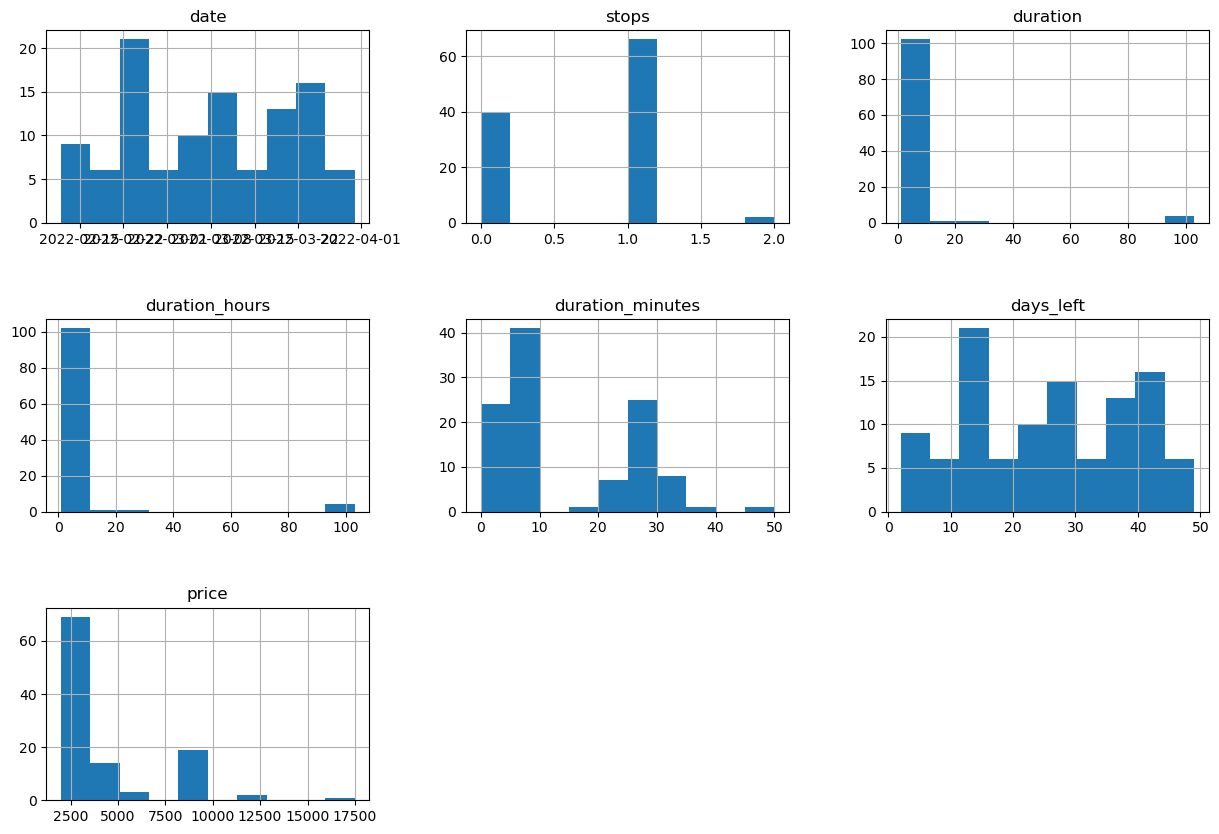

In [41]:
missing_rows.hist(figsize = (15, 10))
plt.subplots_adjust(hspace = 0.5);

In [42]:
print(missing_rows.sort_values('price', ascending = False).head())

             date    airline  flight source_city departure_time  stops  \
110098 2022-02-15    StarAir  S5-131   Bangalore       14:35:00      1   
2036   2022-02-22  Air India  AI-807       Delhi       17:20:00      1   
109764 2022-02-12    StarAir  S5-131   Bangalore       14:35:00      1   
112272 2022-03-05    StarAir  S5-131   Bangalore       14:35:00      1   
169988 2022-03-24    StarAir  S5-150   Hyderabad       08:35:00      1   

       arrival_time destination_city    class  duration  duration_hours  \
110098     19:40:00        Hyderabad  economy      5.08               5   
2036       08:35:00           Mumbai  economy     15.25              15   
109764     19:40:00        Hyderabad  economy      5.08               5   
112272     19:40:00        Hyderabad  economy      5.08               5   
169988     13:40:00        Bangalore  economy      5.08               5   

        duration_minutes  days_left  price  
110098                 5          5  17482  
2036          

In [43]:
missing_rows['class'].unique()

array(['economy'], dtype=object)

## Thoughts

'Missing_rows' does contain the 4 really high duration values. 

The price distribution shows one value really far to the right. When I sort 'missing_rows' by price, that expensive flight was economy, but the ticket was bought only 5 days before departure. This could explain the expensive ticket.  

It's odd that all of the rows that were dropped from 'clean_dataset' were economy flights. No business flights were dropped. 

Nothing is standing out to me that explains why these rows were dropped from 'clean_dataset'. I'm thinking we should fix the duration values and keep the missing rows. 

## Correct really high durration values


In [44]:
high_duration = new[new['duration'] > 100 ]
high_duration

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
96486,2022-02-26,GO FIRST,G8-146,Bangalore,05:45:00,1,09:10:00,Mumbai,economy,103.0,103,0,16,5177
104676,2022-02-26,GO FIRST,G8-146,Bangalore,05:45:00,2,08:00:00,Kolkata,economy,102.0,102,0,16,5177
111315,2022-02-26,GO FIRST,G8-146,Bangalore,05:45:00,2,09:30:00,Hyderabad,economy,103.0,103,0,16,4337
154007,2022-02-25,GO FIRST,G8-517,Hyderabad,20:45:00,1,21:50:00,Delhi,economy,101.0,101,0,15,6132


In [45]:
economy[economy['time_taken'] == "1.01h m"]

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
154007,25-02-2022,GO FIRST,G8,517,20:45,Hyderabad,1.01h m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:50,Delhi,"6,132",economy


In [46]:
new.iloc[96486, 9] = 1.03
new.iloc[96486, 10] = 1
new.iloc[96486, 11] = 2
new.iloc[96486, 9:12]

duration            1.03
duration_hours         1
duration_minutes       2
Name: 96486, dtype: object

In [47]:
new.iloc[111315, 9] = 1.03
new.iloc[111315, 10] = 1
new.iloc[111315, 11] = 2
new.iloc[111315, 9:12]

duration            1.03
duration_hours         1
duration_minutes       2
Name: 111315, dtype: object

In [48]:
new.iloc[104676, 9] = 1.02
new.iloc[104676, 10] = 1
new.iloc[104676, 11] = 1
new.iloc[104676, 9:12]

duration            1.02
duration_hours         1
duration_minutes       1
Name: 104676, dtype: object

In [49]:
new.iloc[154007, 9] = 1.01
new.iloc[154007, 10] = 1
new.iloc[154007, 11] = 0
new.iloc[154007, 9:12]

duration            1.01
duration_hours         1
duration_minutes       0
Name: 154007, dtype: object

In [50]:
high_duration = new[new['duration'] > 100 ]
high_duration

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price


In [51]:
new.to_csv('final_clean_flight_dataset.csv')